## Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. 

In [408]:
# Tools & Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
# import evsluation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from scipy import stats

In [409]:
df = pd.read_csv('bank-additional.csv', delimiter = ';')
df.rename(columns={'y':'Deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [411]:
# data type information
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
Deposit            object
dtype: object

In [412]:
df['Deposit'].value_counts()

Deposit
no     3668
yes     451
Name: count, dtype: int64

In [413]:
df.shape

(4119, 21)

In [414]:
# Count data types in the dataset
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [415]:
# "Now, let's check whether there are any missing values."
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Deposit           0
dtype: int64

In [445]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,...,0,20,0,1,9,17,6,221,10,0
4115,21,0,1,3,0,2,0,1,3,0,...,0,20,0,1,9,17,6,222,10,0
4116,9,8,2,3,0,0,0,0,6,1,...,1,20,1,0,3,8,4,160,6,0
4117,40,0,1,3,0,0,0,0,1,0,...,0,20,0,1,9,13,17,229,10,0


In [417]:
df_encoded.dtypes

age               int64
job               int32
marital           int32
education         int32
default           int32
housing           int32
loan              int32
contact           int32
month             int32
day_of_week       int32
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome          int32
emp.var.rate      int64
cons.price.idx    int64
cons.conf.idx     int64
euribor3m         int64
nr.employed       int64
Deposit           int32
dtype: object

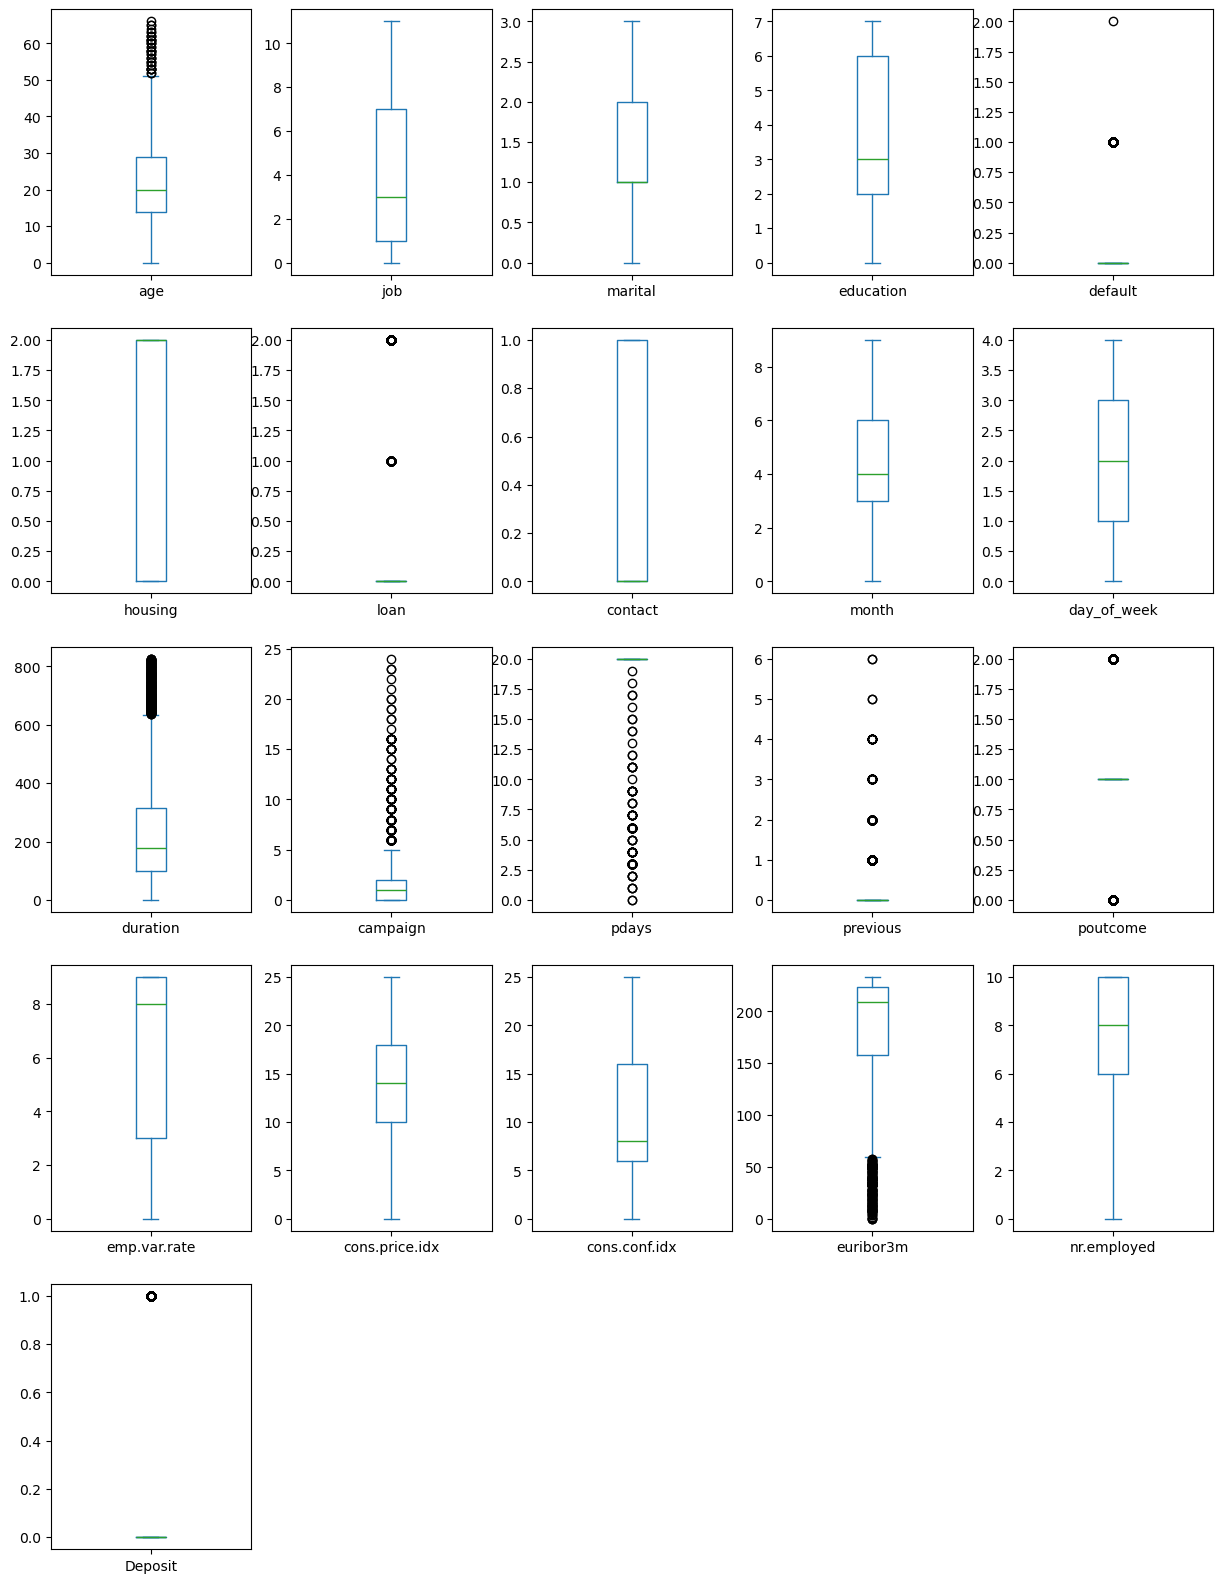

In [418]:
df_encoded.plot(kind='box', subplots=True, layout=(5,5),figsize=(15,20));

In [419]:
# remove outlier
column = df_encoded[['age','campaign','duration','pdays']]
q1 = np.percentile(column,25)
q3 = np.percentile(column,75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
uper_bound = q3 + 1.5 * iqr
df_encoded[['age','campaign','duration','pdays']] = column[(column > lower_bound) & (column < uper_bound)]

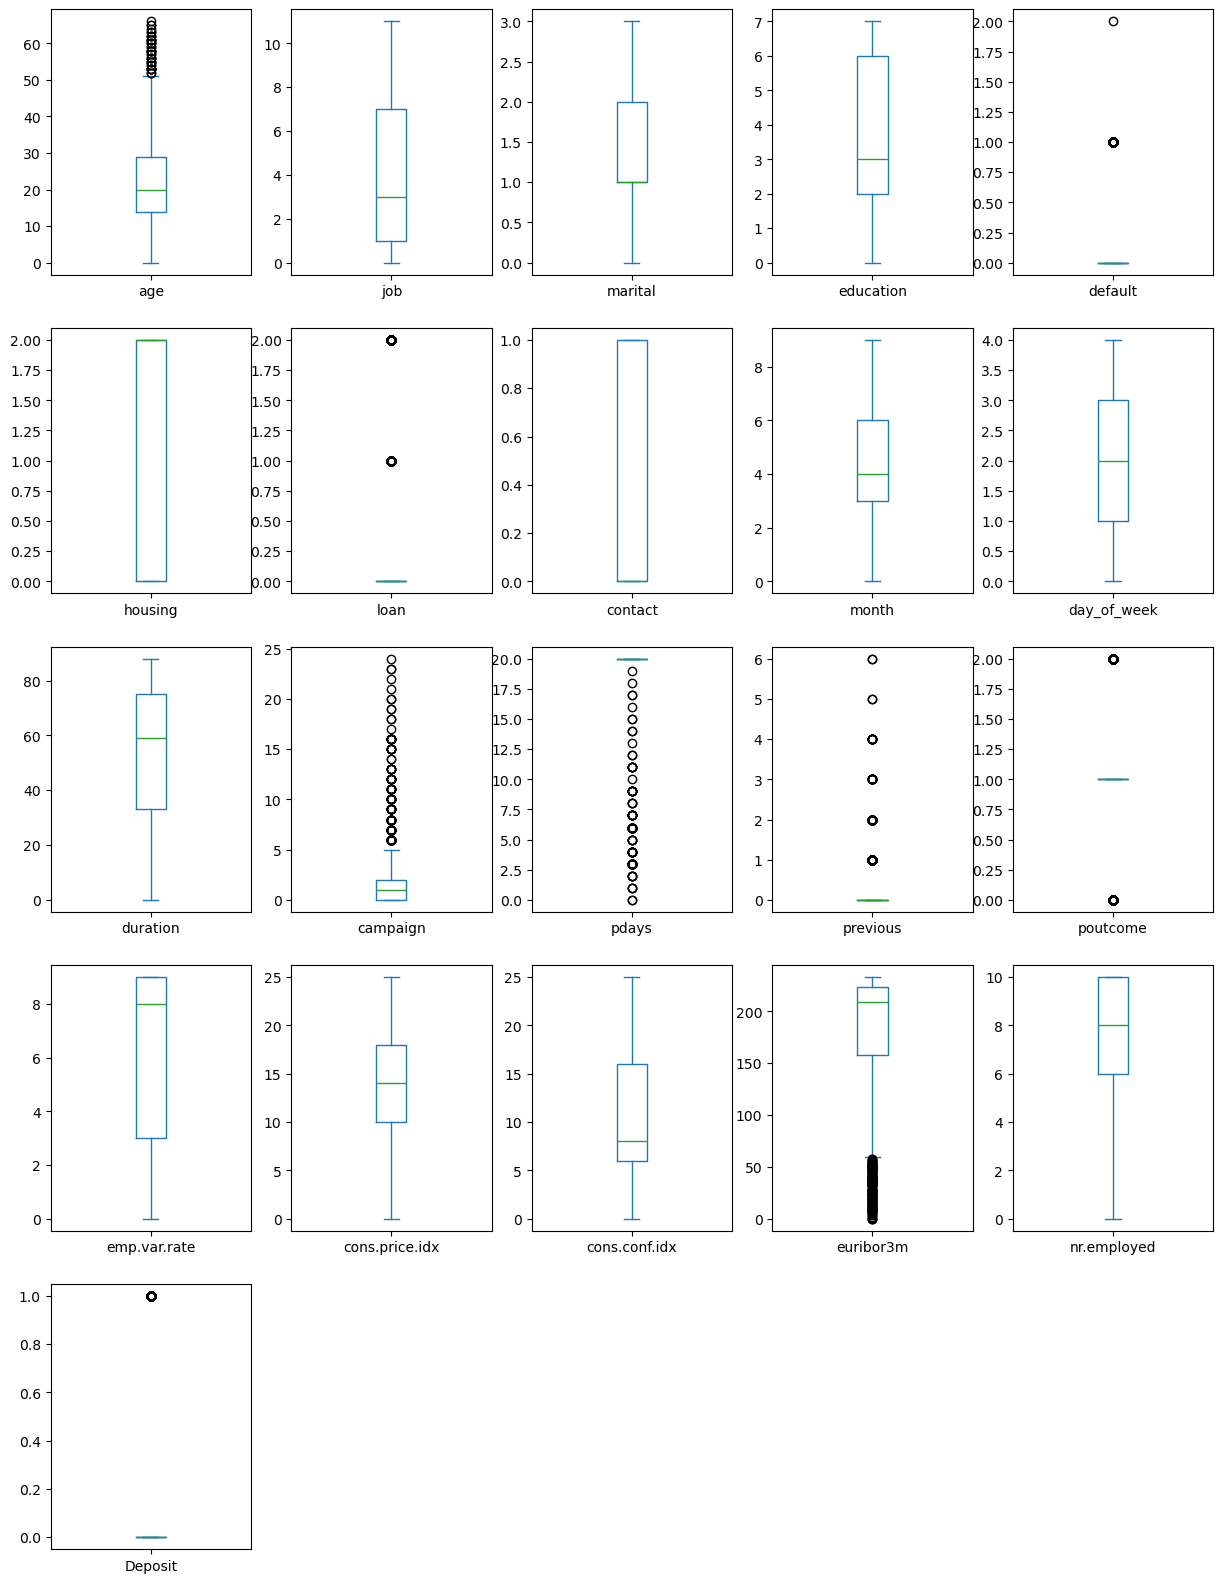

In [420]:
df_encoded.plot(kind='box', subplots=True, layout=(5,5),figsize=(15,20));

In [421]:
# statistical information
df_encoded.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,22.108279,3.824958,1.176985,3.780286,0.195436,1.081573,0.348386,0.356154,4.294975,2.009711,...,1.529012,19.443554,0.190337,0.924253,6.605730,14.237922,10.335276,187.970867,7.822287,0.109493
std,10.291168,3.606319,0.606341,2.149588,0.397196,0.983915,0.741647,0.478920,2.305188,1.389233,...,2.491671,2.855625,0.541788,0.372816,2.779657,5.562328,5.945356,50.166165,2.522647,0.312294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,20.000000,0.000000,1.000000,3.000000,10.000000,6.000000,158.000000,6.000000,0.000000
50%,20.000000,3.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,1.000000,20.000000,0.000000,1.000000,8.000000,14.000000,8.000000,209.000000,8.000000,0.000000
75%,29.000000,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,2.000000,20.000000,0.000000,1.000000,9.000000,18.000000,16.000000,224.000000,10.000000,0.000000
max,66.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,24.000000,20.000000,6.000000,2.000000,9.000000,25.000000,25.000000,233.000000,10.000000,1.000000


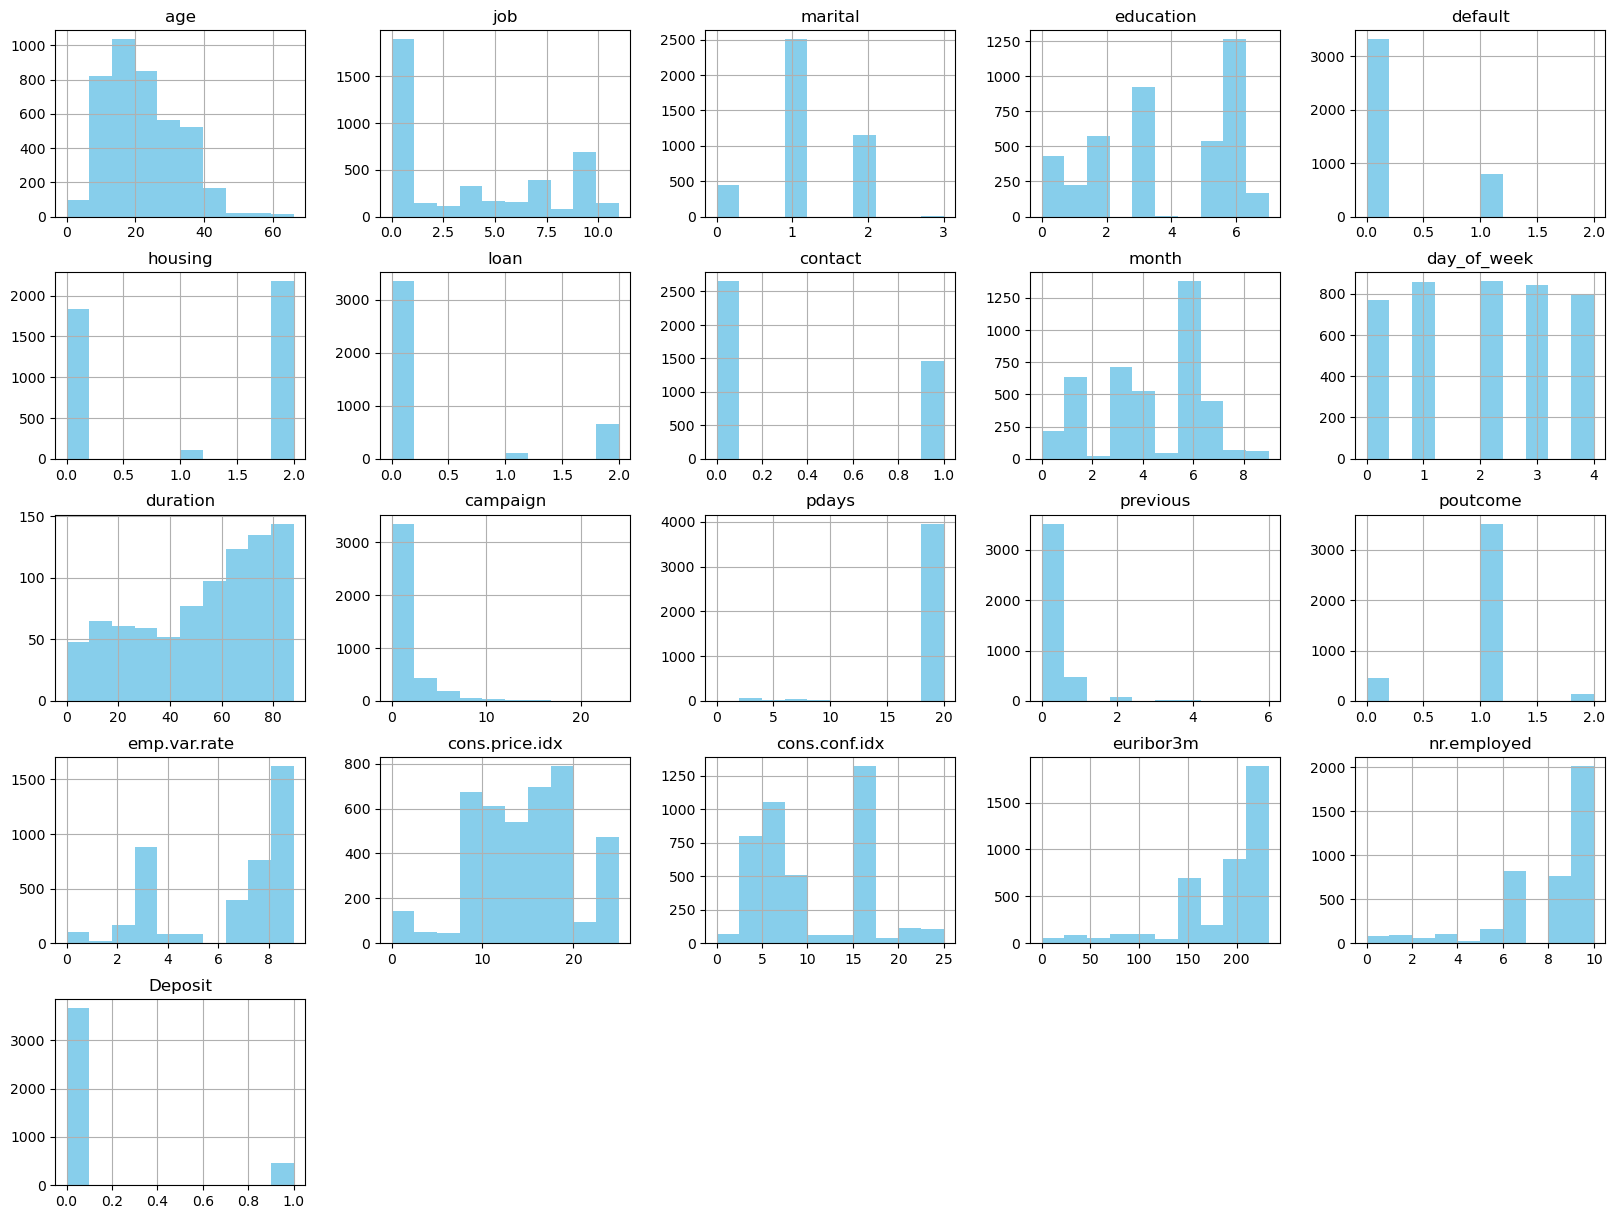

In [422]:
df_encoded.hist(figsize=(20,15),color='skyblue');

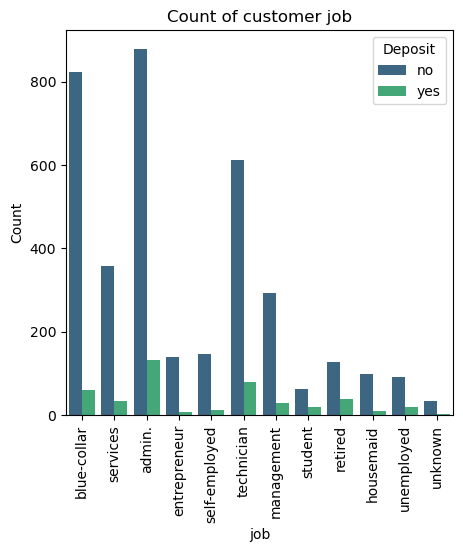

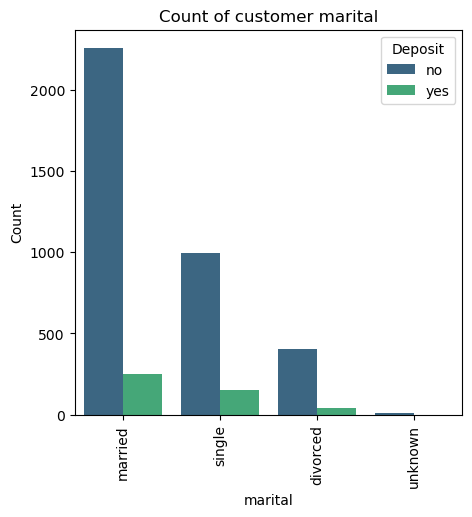

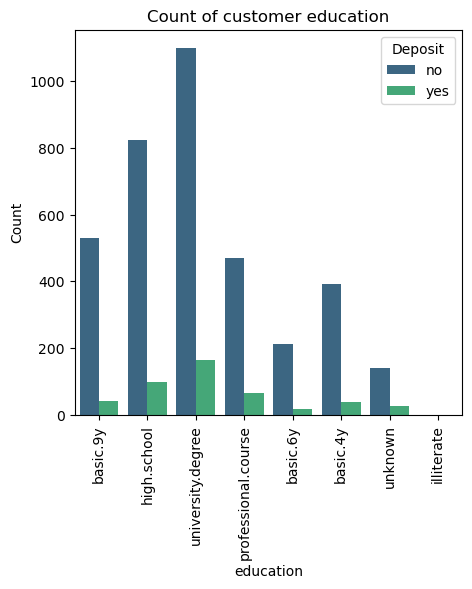

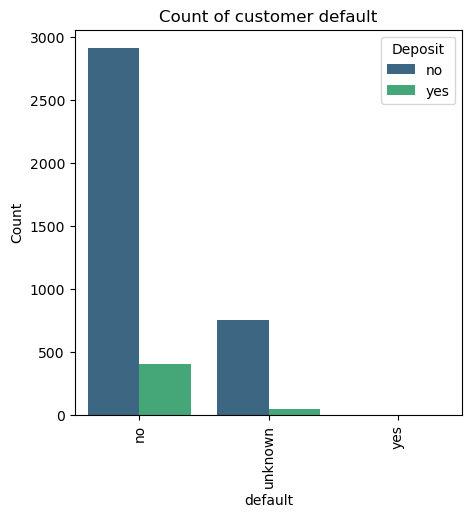

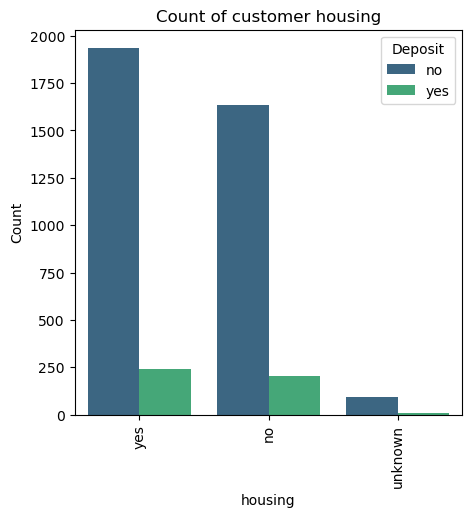

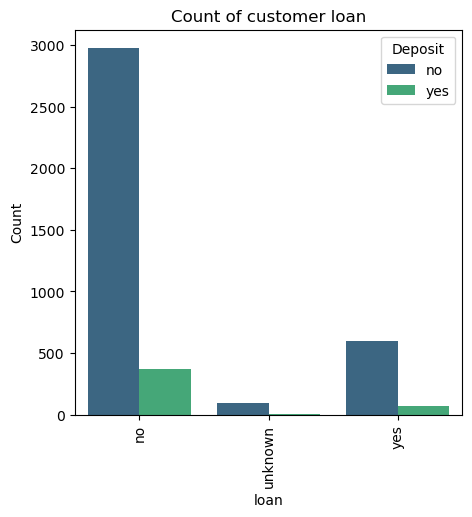

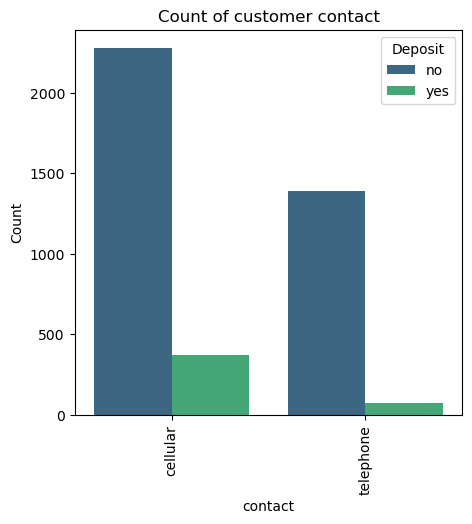

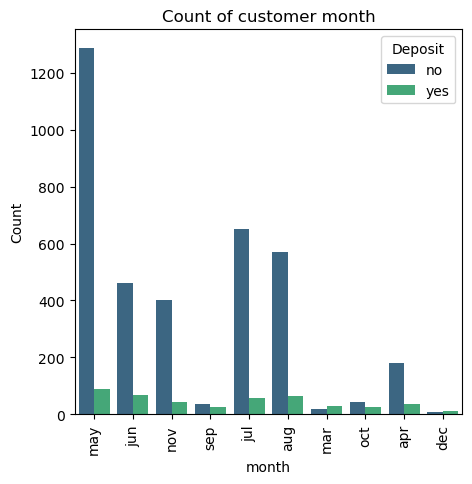

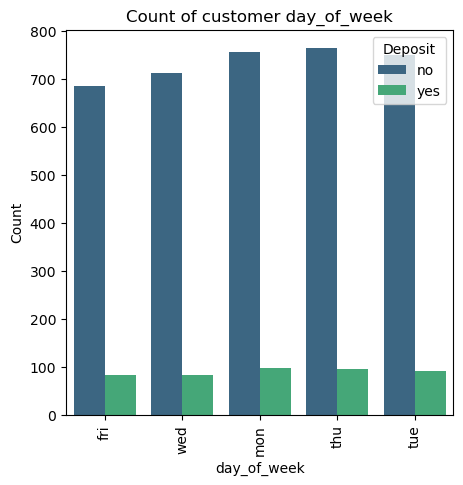

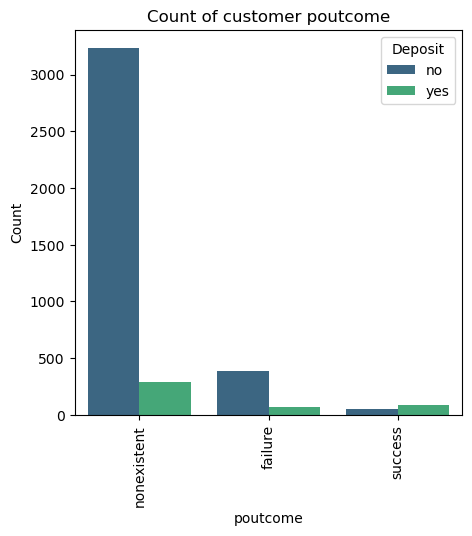

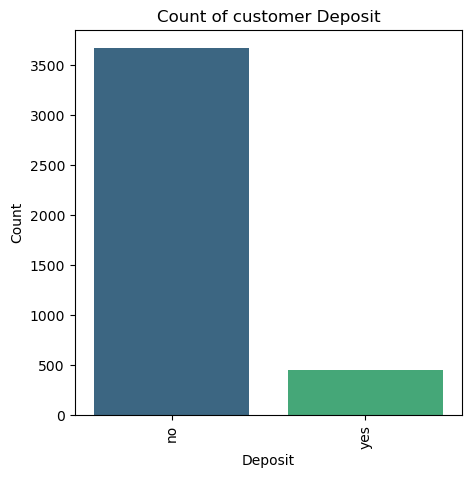

In [423]:
# Plotting count plots for categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'Deposit']
for feature in categorical_features:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, data=df, hue= 'Deposit', palette='viridis')
    plt.title(f'Count of customer {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

In [424]:
# correlation matrix
corr = df_encoded.corr()
corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
age,1.000000,0.014546,-0.394104,-0.125371,0.160629,-0.007492,-0.008889,0.012916,-0.021481,-0.029458,...,-0.012225,-0.046099,0.050178,0.012645,-0.015664,-0.003729,0.099824,-0.054582,-0.048460,0.059704
job,0.014546,1.000000,0.013616,0.134717,-0.040194,0.002725,-0.000800,-0.011981,-0.016835,-0.004120,...,0.001957,-0.002834,0.024140,-0.020159,-0.016697,-0.006252,0.041925,-0.037145,-0.036866,0.026725
marital,-0.394104,0.013616,1.000000,0.104367,-0.082149,0.002659,-0.005926,-0.067432,-0.033537,0.007184,...,0.000699,-0.035111,0.040098,0.001310,-0.065784,-0.046401,-0.015387,-0.070667,-0.069449,0.043833
education,-0.125371,0.134717,0.104367,1.000000,-0.200550,0.030291,-0.021281,-0.116686,-0.080912,-0.042302,...,0.016538,-0.055289,0.045926,0.029832,-0.041650,-0.086919,0.121958,-0.076227,-0.062060,0.067316
default,0.160629,-0.040194,-0.082149,-0.200550,1.000000,-0.011599,0.007872,0.149737,-0.008608,-0.014882,...,0.023346,0.087980,-0.091654,-0.000039,0.168125,0.158877,0.015230,0.171952,0.151244,-0.076627
housing,-0.007492,0.002725,0.002659,0.030291,-0.011599,1.000000,0.064208,-0.073007,-0.039840,0.012389,...,-0.018399,-0.022301,0.025531,0.002946,-0.050746,-0.089094,-0.023191,-0.024462,-0.017737,0.000957
loan,-0.008889,-0.000800,-0.005926,-0.021281,0.007872,0.064208,1.000000,0.004046,-0.024046,0.002608,...,-0.022620,0.004988,-0.005520,0.006759,0.001859,-0.015271,0.002086,0.012648,0.019991,-0.012709
contact,0.012916,-0.011981,-0.067432,-0.116686,0.149737,-0.073007,0.004046,1.000000,0.258733,-0.009579,...,0.089120,0.117955,-0.215464,0.129369,0.336992,0.567090,0.243672,0.254462,0.172800,-0.137401
month,-0.021481,-0.016835,-0.033537,-0.080912,-0.008608,-0.039840,-0.024046,0.258733,1.000000,0.034290,...,-0.084757,-0.049651,0.107278,-0.065263,-0.224051,-0.019281,-0.063138,-0.234546,-0.293277,0.005049
day_of_week,-0.029458,-0.004120,0.007184,-0.042302,-0.014882,0.012389,0.002608,-0.009579,0.034290,1.000000,...,-0.039227,0.011034,-0.016652,-0.001393,0.036207,-0.012618,0.031888,0.028276,0.032367,-0.006370


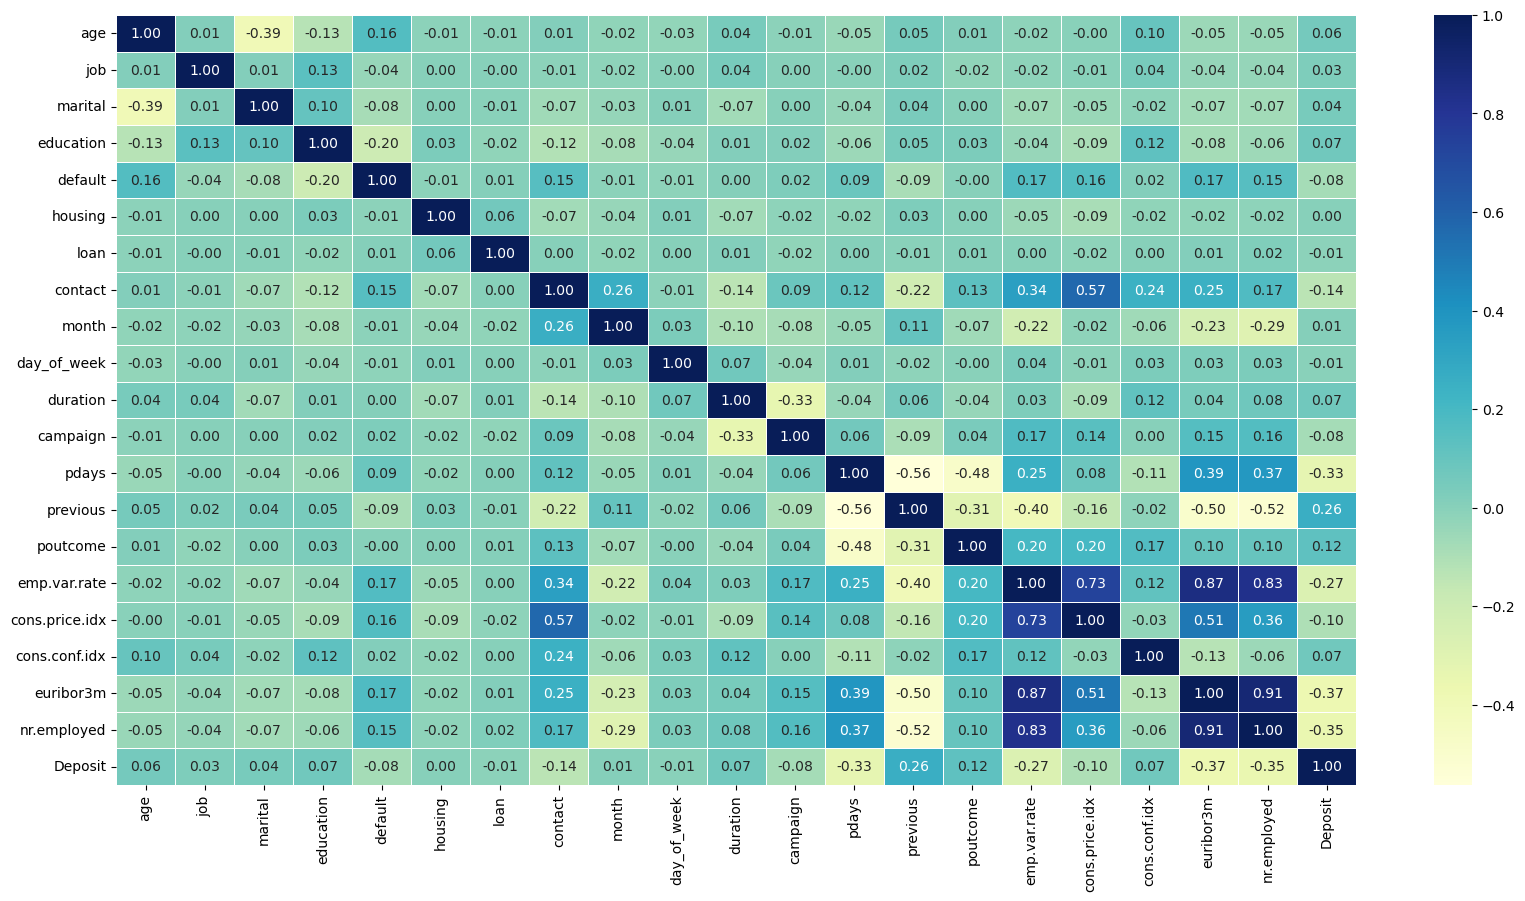

In [425]:
corr_map = corr
plt.figure(figsize=(20,10))
sns.heatmap(corr_map,
             annot=True,
             linewidths=0.5,
             fmt='0.2f',
             cmap='YlGnBu');

In [446]:
df_encoded.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Deposit'],
      dtype='object')

In [447]:
df_encoded.drop(['emp.var.rate','euribor3m','nr.employed','contact','pdays'], inplace=True, axis=1)

In [448]:
print(df_encoded.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'Deposit'],
      dtype='object')


In [449]:
df_encoded.shape

(4119, 16)

# Modelling

In [510]:
# Selecting features and target variabl
np.random.seed(7)
X = df_encoded.drop('Deposit',axis=1)
Y = df_encoded['Deposit']

In [482]:
# Splitting the dataset into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25)

In [483]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [513]:
test_score = dt.score(X_test,Y_test)# test accuracy
test_score

0.9087378640776699

In [512]:
train_score = dt.score(X_train,Y_train)# train accuracy
train_score

0.9307219164778245

In [486]:
# Making predictions
y_predict = dt.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [487]:
# Evaluating the model
accuracy = accuracy_score(Y_test,y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9087378640776699


In [488]:
# confusion matrix
conf_matrix = confusion_matrix(Y_test,y_predict)
print("Confusion_Matrix:\n",conf_matrix)

Confusion_Matrix:
 [[895  24]
 [ 70  41]]


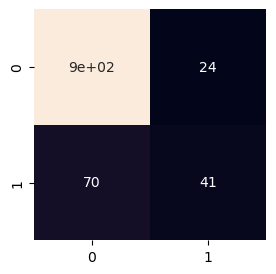

In [498]:
def plot_confusion(Y_test,y_predict):
    "This is plot the confusion matrix"
    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,y_predict),
                  annot=True,
                  cbar=False)
plot_confusion(Y_test,y_predict)

In [489]:
# classification report
print("\nClassification Report:\n", classification_report(Y_test, y_predict))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       919
           1       0.63      0.37      0.47       111

    accuracy                           0.91      1030
   macro avg       0.78      0.67      0.71      1030
weighted avg       0.90      0.91      0.90      1030



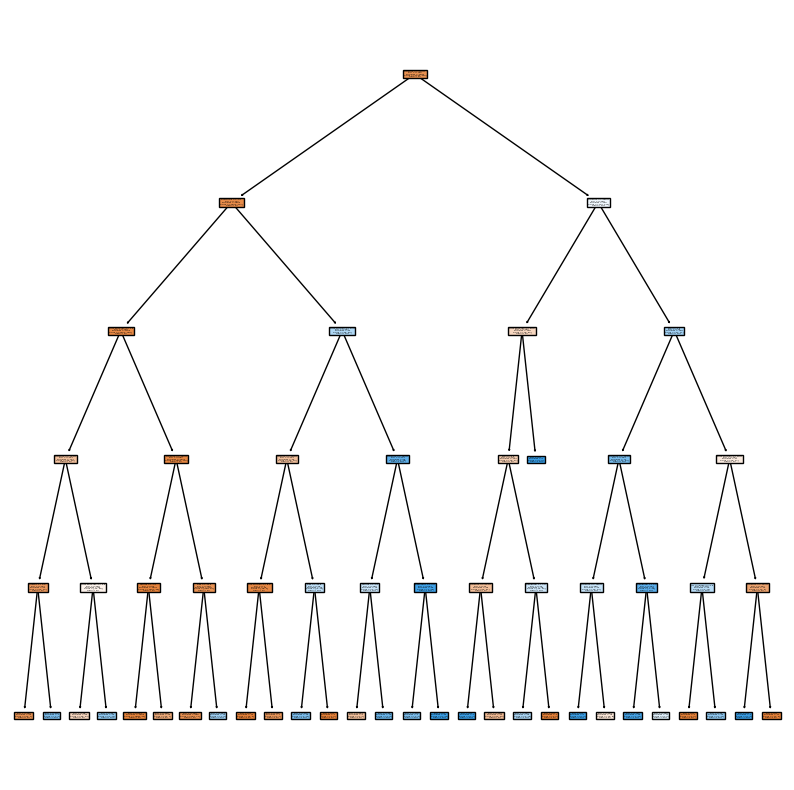

In [490]:
# Visualizing the decision tree
cn = ['no','yes']
plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=cn)
plt.show()